In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2026-02-05 05:00:07.874844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770267608.046713      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770267608.099755      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770267608.528478      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770267608.528523      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770267608.528526      55 computation_placer.cc:177] computation placer alr

In [2]:
DATASET_DIR = "/kaggle/input/leaf-vs-non-leaf-images"

In [3]:
print(os.listdir(DATASET_DIR))

['non_leaf', 'leaf']


In [4]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 10400 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1770267629.553503      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1770267629.559663      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1770267633.580269     137 service.cc:152] XLA service 0x7c7ca8006250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770267633.580308     137 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1770267633.580312     137 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1770267634.035928     137 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-05 05:00:36.516201: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 05:00:36.664173: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  2/325 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.5938 - loss: 1.1075

I0000 00:00:1770267639.191321     137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  4/325 ━━━━━━━━━━━━━━━━━━━━ 1:02 194ms/step - accuracy: 0.5872 - loss: 1.3586

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


325/325 ━━━━━━━━━━━━━━━━━━━━ 159s 468ms/step - accuracy: 0.8502 - loss: 0.3814 - val_accuracy: 0.9038 - val_loss: 0.2421
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 102s 314ms/step - accuracy: 0.9537 - loss: 0.1211 - val_accuracy: 0.9481 - val_loss: 0.1214
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 100s 309ms/step - accuracy: 0.9718 - loss: 0.0838 - val_accuracy: 0.9531 - val_loss: 0.1632
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 106s 325ms/step - accuracy: 0.9788 - loss: 0.0625 - val_accuracy: 0.9596 - val_loss: 0.1224
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 104s 321ms/step - accuracy: 0.9810 - loss: 0.0516 - val_accuracy: 0.9492 - val_loss: 0.1139
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 102s 315ms/step - accuracy: 0.9848 - loss: 0.0457 - val_accuracy: 0.9435 - val_loss: 0.1559
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 102s 314ms/step - accuracy: 0.9863 - loss: 0.0421 - val_accuracy: 0.9496 - val_loss: 0.2068
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 103s 316ms/step - accuracy: 0.9824 - loss: 0.04

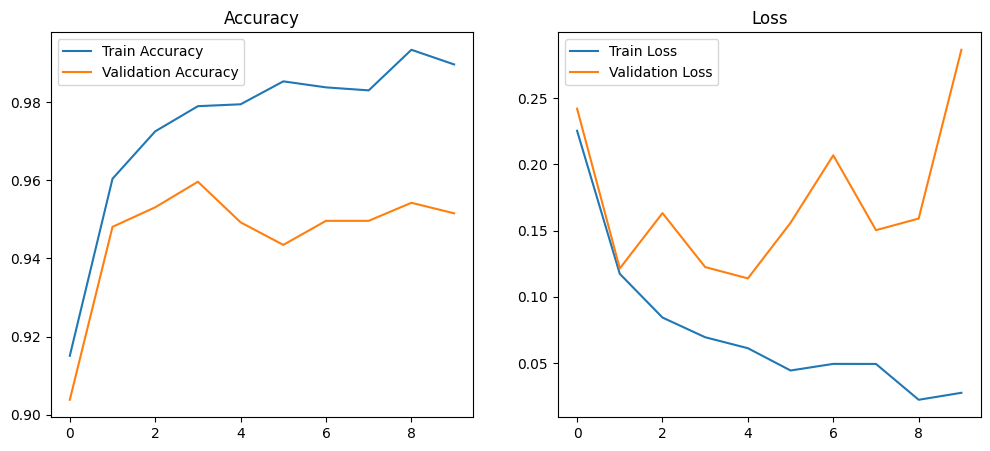

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [10]:
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"\nFinal Validation Accuracy: {val_accuracy * 100:.2f}%")

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy (Last Epoch): {val_acc * 100:.2f}%")

best_val_acc = max(history.history['val_accuracy'])
print(f"Best Validation Accuracy Achieved: {best_val_acc * 100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 310ms/step - accuracy: 0.9494 - loss: 0.2827

Final Validation Accuracy: 95.15%
Final Training Accuracy: 98.96%
Final Validation Accuracy (Last Epoch): 95.15%
Best Validation Accuracy Achieved: 95.96%


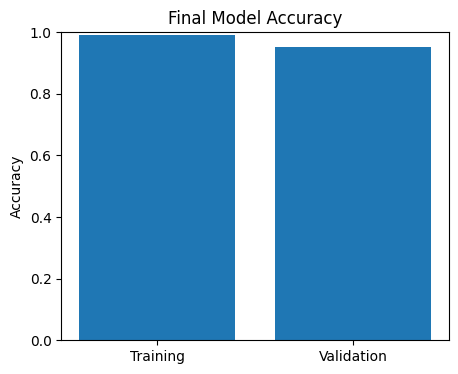

In [11]:
plt.figure(figsize=(5,4))
plt.bar(['Training', 'Validation'], [train_acc, val_acc])
plt.title('Final Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [12]:
print("\nClass Indices:")
print(train_generator.class_indices)


Class Indices:
{'leaf': 0, 'non_leaf': 1}


In [14]:
class_names = ['leaf', 'non_leaf']

In [15]:
import numpy as np

def predict(model, img):
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img, verbose=0)[0][0]

    if prediction > 0.5:
        predicted_class = class_names[1]
        confidence = prediction * 100
    else:
        predicted_class = class_names[0]
        confidence = (1 - prediction) * 100

    return predicted_class, round(confidence, 2)

In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

Found 13000 files belonging to 2 classes.


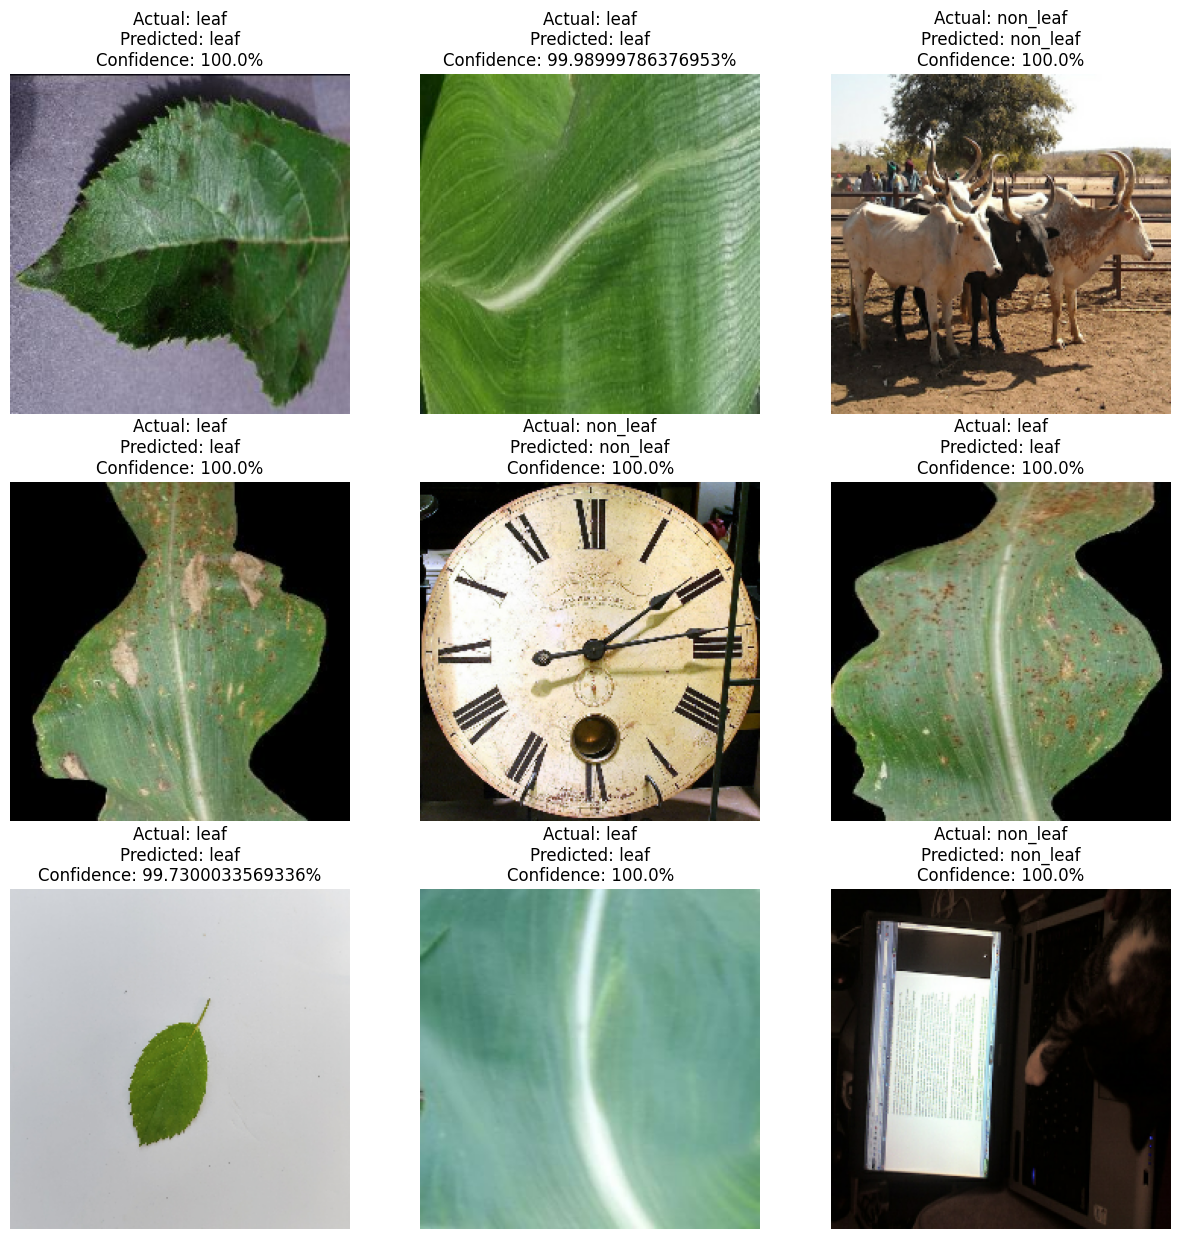

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\n"
            f"Predicted: {predicted_class}\n"
            f"Confidence: {confidence}%"
        )

        plt.axis("off")

plt.show()

In [ ]:
model.save("leaf_vs_non_leaf_model.keras")